# **Machine Learning : Recheche de Similarités (KNN)**

## **Description**

Dans ce projet, j'ai utilisé le machine learning pour effectuer une recherche de similarité entre différents pokémons en fonction de leurs caractéristiques. L'objectif était de prédire quels pokémons "réguliers" sont les plus similaires à un pokémon légendaire, basé sur des critères comme le type et les statistiques de combat.

Le modèle permet d'identifier les pokémons les plus proches d'une liste de pokémon légendaire, les représentations graphiques permettent de visualiser directement les pokémons les plus "proches".

## **Quête des Pokémons**

### **Contexte**

Un champion du monde Pokémon a besoin d'aide. Pour sa prochaine compétition, il doit remplacer ses Pokémon légendaires par des Pokémon non-légendaires ayant des caractéristiques similaires.

Le champion utilise habituellement : **Mewtwo, Lugia, Rayquaza, Giratina, Dialga, et Palkia**.

Cependant, les Pokémon légendaires sont interdits dans la prochaine compétition.

### **Données**

Utilisation du dataset `pokemon.csv` ("https://raw.githubusercontent.com/murpi/wilddata/master/pokemon.csv").

Chaque ligne représente un Pokémon avec ses différentes caractéristiques (attaque, défense, vitesse, etc.), ainsi qu'une colonne indiquant s'il est légendaire ou non.

### **Objectif**

Utiliser la méthode `NearestNeighbors` pour recommander des Pokémon non-légendaires similaires aux Pokémon légendaires que le champion a l'habitude d'utiliser.

## **Méthodologie**

- **Recommandation de Pokémon**

Que veut-on prédire ?

L’objectif est de **recommander des Pokémon non-légendaires ayant des caractéristiques similaires aux Pokémon légendaires que le champion utilise habituellement**.

- **Quelle est la variable cible ?**

Ici, la notion de "variable cible" est différente des approches classiques de prédiction.

Nous ne cherchons pas à prédire une classe ou une valeur, mais plutôt **à trouver des correspondances optimales entre des Pokémon légendaires spécifiques et des Pokémon non-légendaires**.

Cela repose sur un problème de recherche de similarités entre les entités, basé sur leurs caractéristiques numériques, et leurs types.

- **Quel type de Machine Learning utiliser ?**

Utilisation d'une méthode de **Machine Learning non supervisé**, avec une approche de recherche des plus proches voisins (Nearest Neighbors)

Cette méthode permettra de calculer la distance entre les caractéristiques des Pokémon légendaires et celles des Pokémon non-légendaires.

L’objectif est de **trouver pour chaque Pokémon légendaire un Pokémon non-légendaire qui lui ressemble le plus**.

## **Résolution**

### **Exploration et préparation des données**

- Compréhension des caractéristiques des Pokémon (statistiques : HP, Attack, Defense, etc.).

- Identification et traitement des valeurs manquantes ou incohérentes.

- Sélection des variables pertinentes (statistiques et autres caractéristiques utiles pour définir la similarité).

#### **Exploration du DataSet**

In [1]:
# Eviter les messages 'futurs warnings'
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

##### Import et Chargement

In [2]:
import pandas as pd
import numpy as np

# import du modèle KNN
from sklearn.neighbors import NearestNeighbors

import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du DataSet :
df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


##### Types des Colonnes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


`'Type 1'`, `'Type 2'` : Objet (String) à convertir pour la classification.

`'HP'`, `'Attack'`, `'Defense'`, `'Sp. Atk'`, `'Sp. Def'`, `'Speed'` : integer utilisables pour la prédiction.

`'Génération'` : A utiliser comme valeur catégorielle, à transformer en objet.

In [4]:
# Transformation de la colonne 'Génération' en objet
df['Generation'] = df['Generation'].astype('object')

##### Valeurs nulles

In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- Le Machine Learning n'aime pas les `NaN`

- Remplacement des valeurs `NaN` par `None` pour éviter des erreurs de ML par la suite

- En fonction du pourçentage de valeurs nulles dans `'Type 2'` la colonne pourrait être supprimée du modèle.

In [6]:
# Pourçentage de valeurs nulles de la colonne 'Type 2' :
pourcentage_nulles = df['Type 2'].isnull().mean() * 100
print(f"Pourcentage de valeurs nulles : {pourcentage_nulles:.2f}%")

Pourcentage de valeurs nulles : 48.25%


- La plupart des Pokémons ne possèdent qu'un seul type, ce qui explique les NaN dans `Type 2 `.

- Le `'Type 2'` est capital dans les caractéristiques des Pokémons, la colonne sera conservée.

- Un modèle sans la colonne `'Type 2'`sera testé car **près de 50% des valeurs sont nulles**.

In [7]:
# Remplacement des valeurs NaN par None:
df['Type 2'] = df['Type 2'].fillna('None')

#### **Sélection des caractéristiques pertinentes**

In [8]:
#Liste des colonnes
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

**Les colonnes pertinentes pour l'analyse sont :**
- `'Type 1'`, `'Type 2'`, `'HP'`, `'Attack'`, `'Defense'`, `'Sp. Atk'`, `'Sp. Def'`, `'Speed'`, `'Generation'` : caractéristiques propres pour chaque Pokémon

- `'Legendary'` : Booléen pour filtrer si légendaire ou non. Utile pour séparer le df en 2.

- `'#'` : inutile pour la recherche de similarité ; la colonne sera supprimée.

- `'Name'` : indispensable pour les infos `'nom'` de chaque pokémon, mais à exclure du modèle KNN.

In [9]:
# Définition des variables caractéristiques pour le machine learning
caracteristiques = ['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
# Suppression de la colonne 'Type 2' pour test modèle 2 (50% de valeurs nulles)
caracteristiques2 = ['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

### **Séparation des données**

- Constitution d’un sous-ensemble (table) regroupant uniquement les Pokémons non-légendaires (ou réguliers) ; tableau utilisé pour la création du modèle KNN.

- Création d’une autre table contenant uniquement les Pokémon légendaires mentionnés dans l’énoncé (`Mewtwo`, `Lugia`, `Rayquaza`, `Giratina`, `Dialga`, et `Palkia`).

#### **Ratio Légendaires / Non Légendaires**

In [10]:
# Nombre de Pokémon légendaires et non-légendaires
comptage_légendaire = df['Legendary'].sum()
total_comptage = len(df)

# Proportion
ratio_légendaire = comptage_légendaire / total_comptage
print(f"Nombre total de Pokémon : {total_comptage}")
print(f"Nombre de Pokémon légendaires : {comptage_légendaire}")
print(f"Proportion de Pokémon légendaires : {ratio_légendaire:.2%}")


Nombre total de Pokémon : 800
Nombre de Pokémon légendaires : 65
Proportion de Pokémon légendaires : 8.12%


#### **Séparation des Légendaires et des Pokémons réguliers**

Pourquoi séparer avant de normaliser ?

Séparer les légendaires de tous les réguliers avant de faire la normalisation est la méthode la plus cohérente pour la problématique.

- **Préserver la cohérence des comparaisons** :

En normalisant les pokémons réguliers à part, leurs caractéristiques seront ajustées uniquement selon leurs propres moyennes et écart-types, sans être influencées par les valeurs extrêmes des légendaires.

- **Assurer une échelle commune** :

Une fois que les réguliers et les légendaires de référence sont séparés, les deux groupes seront normalisés avec le même scaler (fit_transform sur les réguliers, transform sur les légendaires), ce qui garantit que les deux jeux de données sont comparables.

- **Simplifier la recherche de correspondances** :

Les légendaires normalisés auront des valeurs sur la même échelle que les réguliers normalisés, donc les modèles comme `Nearest Neighbors` fonctionneront correctement.

##### **Séparation réguliers et légendaires.**

In [11]:
# Liste des pokémons légendaires à cibler
legendaires_cibles = ['Mewtwo',
                      'Lugia',
                      'Rayquaza',
                      'Giratina Altered Forme',
                      'Giratina Origin Forme',
                      'Dialga',
                      'Palkia']

# Séparer les réguliers
réguliers = df[df['Legendary'] == False].drop(columns=['Legendary'])

# Filtrer les légendaires pertinents
légendaires = df[(df['Legendary'] == True) & (df['Name'].isin(legendaires_cibles))].drop(columns=['Legendary'])

In [12]:
# Aperçu de la table des pokémons réguliers :
réguliers.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,5,Charmander,Fire,None,39,52,43,60,50,65,1


In [13]:
# Aperçu de la table des pokémons légendaires ciblés :
légendaires

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
162,163,Mewtwo,Psychic,None,106,110,90,154,90,130,1
269,270,Lugia,Psychic,Flying,106,90,130,90,154,110,2
425,426,Rayquaza,Dragon,Flying,105,150,90,150,90,95,3
540,541,Dialga,Steel,Dragon,100,120,120,150,100,90,4
541,542,Palkia,Water,Dragon,90,120,100,150,120,100,4
544,545,Giratina Altered Forme,Ghost,Dragon,150,100,120,100,120,90,4
545,546,Giratina Origin Forme,Ghost,Dragon,150,120,100,120,100,90,4


In [14]:
# Réinitialiser les index des deux DataFrames
réguliers = réguliers.reset_index(drop=True)
légendaires = légendaires.reset_index(drop=True)

### **Encodage des données**

- Utilisation de la fonction d'encodage du tableau des pokémons réguliers

- Encodage des variables catégoriques (Type 1, Type 2) via get dummies.

- Normalisation des données numériques pour uniformiser les échelles des différentes variables.

#### **Définitions des variables Explicatives (X)**

**Variables numériques** :

Les caractéristiques classiques qui décrivent les statistiques des Pokémon :

- `Attack`
- `Defense`
- `Speed`
- `HP`
- `Sp. Atk`
- `Sp. Def`

**Variables catégorielles** :

- `Type 1` : Le type principal du Pokémon
- `Type 2` : Le type secondaire (si disponible, sinon NaN).
- `Génération` : Transformée en objet, à inclure dans le modèle

#### **Encodage avec fonction pré-construite**

- Nous devons **conserver les proportions d’écarts entre les caractéristiques des Pokémon**, car les valeurs relatives des statistiques (HP, Attack, etc.) définissent leur "style de combat".

- Les échelles doivent refléter ces relations pour que l'algorithme de Nearest Neighbors fasse des correspondances pertinentes.

- Nous utilisons donc **la Normalisation** via `MinMaxScaler`.

- Utilisation de la fonction Type pour Normalisation / Standardisation (Trame du cours de la WILD)

- Nous allons `fit` et `tranform` le DataFrame des pokémons `réguliers`, puis `transform` le DataFrame `Légendaires` selon le `fit` des réguliers pour avoir une cohérence de valeurs.

In [15]:
def encodage_X(X, type='standard'):
  index = X.index
  X_num = X.select_dtypes('number')
  X_cat = X.select_dtypes(['object', 'category', 'string'])

  if type == 'standard':
    from sklearn.preprocessing import StandardScaler
    SN = StandardScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns, index=index)

  else:
    from sklearn.preprocessing import MinMaxScaler
    SN = MinMaxScaler()
    X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns, index=index)

  X_cat_dummies = pd.get_dummies(X_cat)
  X_encoded = pd.concat([X_num_SN, X_cat_dummies], axis=1)

  return X_encoded, SN

- **Encodage 1**

In [16]:
# Définition de X (les colonnes caractéristiques):
X = réguliers[caracteristiques]

# Encodage, Application de la fonction
X_réguliers, SN = encodage_X(X, type='normalisation')

X_réguliers.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.173228,0.244444,0.195556,0.333333,0.214286,0.258065,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.232283,0.316667,0.257778,0.424242,0.285714,0.354839,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.311024,0.427778,0.346667,0.545455,0.380952,0.483871,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.311024,0.527778,0.524444,0.678788,0.476190,0.483871,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.149606,0.261111,0.168889,0.303030,0.142857,0.387097,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


- **Encodage 2 (sans la colonne `'Type 2'`)**

In [17]:
# Définition de X (les colonnes caractéristiques):
X2 = réguliers[caracteristiques2] # caractéristiques sans 'Type 2'

# Encodage, Application de la fonction
X_réguliers2, SN2 = encodage_X(X2, type='normalisation')

X_réguliers2.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.173228,0.244444,0.195556,0.333333,0.214286,0.258065,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.232283,0.316667,0.257778,0.424242,0.285714,0.354839,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.311024,0.427778,0.346667,0.545455,0.380952,0.483871,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.311024,0.527778,0.524444,0.678788,0.476190,0.483871,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.149606,0.261111,0.168889,0.303030,0.142857,0.387097,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


### **Optimisation de k** :

- Recherche du **nombre de voisins optimal (k)** pour maximiser les performances

- Score de Silhouette pour évaluer la qualité du clustering

- Utilisation de fonction d'évaluation WCS pré-construite

**Pourquoi optimiser k ?**
   - Un k trop petit peut rendre le modèle sensible au bruit
   - Un k trop grand peut inclure des Pokémon trop différents
   - Le k optimal trouve un équilibre entre ces deux extrêmes

**Méthodes d'optimisation utilisées :**
   - **Distance moyenne aux voisins** :
     - Mesure la distance moyenne entre chaque point et ses k voisins
     - On cherche le "coude" dans le graphique (point d'inflexion)
     - Ce point représente où l'ajout de voisins n'apporte plus beaucoup d'information

   - **Score de silhouette** :
     - Mesure la qualité des clusters formés
     - Varie entre -1 (mauvais) et 1 (excellent)
     - Un score plus élevé indique une meilleure séparation des groupes

**Interprétation des résultats :**
   - Le point d'inflexion dans le graphique des distances montre où l'ajout de voisins devient moins utile
   - Le meilleur score de silhouette indique la valeur de k qui crée les groupes les plus cohérents
   - On choisit généralement k entre ces deux valeurs

**Considérations pratiques :**
   - Pour les Pokémon, un k trop grand pourrait recommander des Pokémon très différents
   - Un k trop petit pourrait ne pas capturer assez de similitudes
   - En pratique, un k entre 3 et 7 est souvent un bon compromis pour ce type de recommandation

Cette optimisation permet d'avoir des recommandations plus pertinentes et basées sur des critères objectifs plutôt que sur un choix arbitraire de k.

- Fonction d'évaluation de k

In [18]:
# Fonction évaluation de k
def evaluate_k(X_encoded, k_range):
    """
    Évalue différentes valeurs de k en utilisant la somme des distances aux voisins
    et le score de silhouette comme métriques.

    Args:
        X_encoded (DataFrame): Données normalisées
        k_range (range): Plage de valeurs de k à tester

    Returns:
        tuple: (distances moyennes, scores de silhouette)
    """
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans

    avg_distances = []
    silhouette_scores = []

    for k in k_range:
        # Calcul des distances moyennes pour chaque k
        model = NearestNeighbors(n_neighbors=k)
        model.fit(X_encoded)
        distances, _ = model.kneighbors(X_encoded)
        avg_distances.append(np.mean(distances))

        # Calcul du score de silhouette
        # Nous utilisons KMeans pour créer des clusters et évaluer la qualité
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X_encoded)
        if k > 1:  # Le score de silhouette nécessite au moins 2 clusters
            silhouette_scores.append(silhouette_score(X_encoded, clusters))
        else:
            silhouette_scores.append(0)

    return avg_distances, silhouette_scores

- Visualisation - Score de Silhouette - Encodage `X_réguliers`

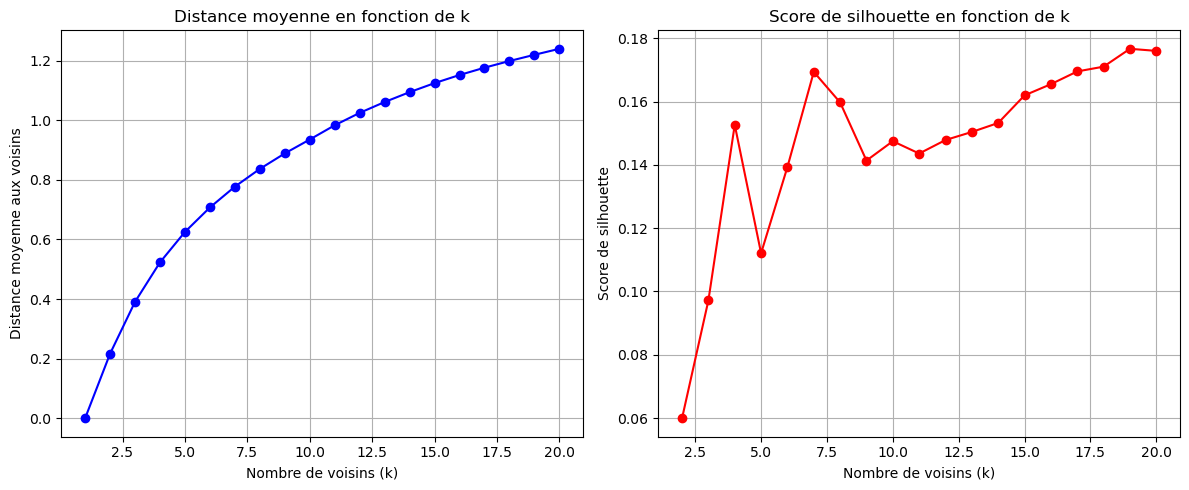

In [19]:
# Définition de la plage de k à tester
k_range = range(1, 21)  # Test des valeurs de k de 1 à 20

# Évaluation des différentes valeurs de k
avg_distances, silhouette_scores = evaluate_k(X_réguliers, k_range)

# Création d'une visualisation pour aider à choisir k
plt.figure(figsize=(12, 5))

# Premier graphique : Distance moyenne aux voisins
plt.subplot(1, 2, 1)
plt.plot(k_range, avg_distances, 'bo-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Distance moyenne aux voisins')
plt.title('Distance moyenne en fonction de k')
plt.grid(True)

# Second graphique : Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # On commence à k=2
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de k')
plt.grid(True)

plt.tight_layout()
plt.show()

- Visualisation - Score de Silhouette - Encodage `X_réguliers2`

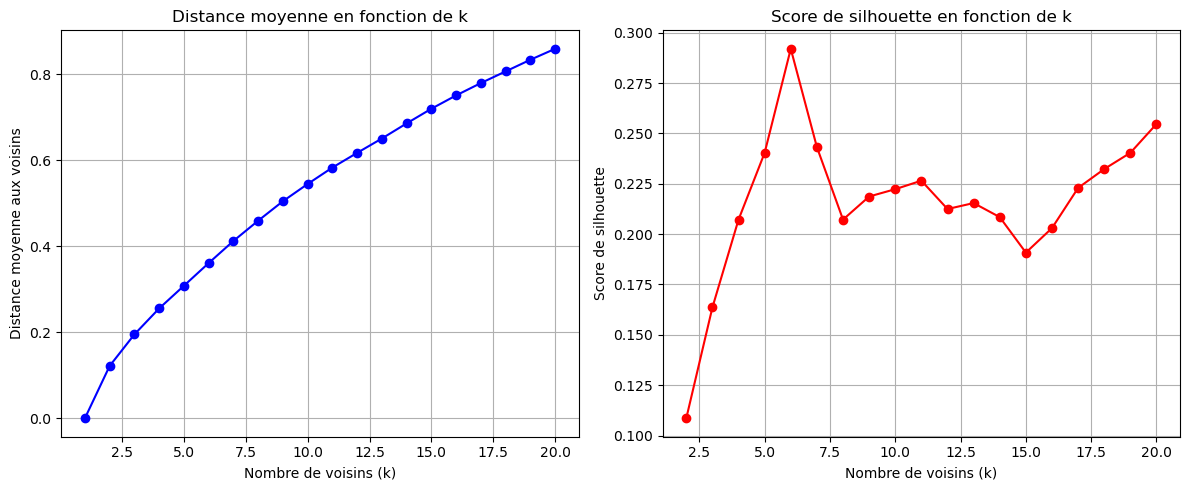

In [20]:
# Définition de la plage de k à tester
k_range = range(1, 21)  # Test des valeurs de k de 1 à 20

# Évaluation des différentes valeurs de k
avg_distances, silhouette_scores = evaluate_k(X_réguliers2, k_range)

# Création d'une visualisation pour aider à choisir k
plt.figure(figsize=(12, 5))

# Premier graphique : Distance moyenne aux voisins
plt.subplot(1, 2, 1)
plt.plot(k_range, avg_distances, 'bo-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Distance moyenne aux voisins')
plt.title('Distance moyenne en fonction de k')
plt.grid(True)

# Second graphique : Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # On commence à k=2
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de k')
plt.grid(True)

plt.tight_layout()
plt.show()

- **Choix du nombre de voisins** :

    - Le score de silhouette est meilleur pour l'encodage 2 (environ 0.3) vs l'encodage 1 (environ 0.16) > **`X_réguliers2` est conservé pour la suite**.

    - Dans l'encodage 2, **le nombre de voisins optimal (k) est de 6**.

### **Entrainement du modèle**

- Choix du nombre de voisins

- Entrainement du modèle `Nearest Neighbors` sur le tableau des pokémons réguliers.

#### **Choix du nombre de voisins**

In [21]:
k = 6

#### **Entrainement du modèle NearestNeighbors**

In [22]:
# Entrainement du modèle sur X_encoded2
modèle = NearestNeighbors(n_neighbors=k, metric='euclidean')
modèle.fit(X_réguliers2)

NearestNeighbors(metric='euclidean', n_neighbors=6)

### Recherche de Similarités

- Encodage du tableau des pokémons légendaires selon le modèle des pokémons réguliers (normalisation / getdummies)

- Application du modèle KNN sur les pokémons légendaires.

- Affichage des voisins proches trouvés

- Vérification / Visualisation

#### Fonction d'encodage des légendaires

In [23]:
def encodage_predict(df_a_predire):
  X_num = df_a_predire.select_dtypes('number')
  X_cat = df_a_predire.select_dtypes(['object', 'category', 'string'])

  X_num_SN = pd.DataFrame(SN.transform(X_num), columns=X_num.columns).reset_index(drop=True)

  X_cat_dummies = pd.get_dummies(X_cat).reset_index(drop=True)
  X_encoded_predire = pd.concat([X_num_SN, X_cat_dummies], axis=1)

  df_predict = X_encoded_predire

  # DataFrame vide qui a les mêmes colonnes que X_réguliers2
  df_final = pd.DataFrame(columns=X_réguliers2.columns)

  # On veut que le DataFrame ait le même nombre de lignes que df_predict
  df_final = df_final.reindex(index=df_predict.index)
  # On met tous les NaN à False
  df_final = df_final.fillna(False)

  # On parcourt chaque colonne de df_predict
  # Si la colonne est présente dans X_réguliers2 alors on la garde
  # Sinon, on la met à False
  for column in df_predict.columns:
    if column in X_réguliers2.columns:
      df_final[column] = df_predict[column]

  return df_final

#### Test du modèle sur un pokémon : `Mewtwo`

In [24]:
# Caractéristiques de Mewtwo :
df[df['Name'] == 'Mewtwo']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,None,106,110,90,154,90,130,1,True


In [25]:
# Récupération des caractéristiques de Mewtwo :
pokemon_test = 'Mewtwo'
caract_pokemon_test = df[df['Name'] == 'Mewtwo']
caract_pokemon_test = caract_pokemon_test[caracteristiques2]

caract_pokemon_test

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
162,Psychic,106,110,90,154,90,130,1


- Les caractéristiques choisies doivent être identiques à celle du modèle d'entrainement des réguliers.

In [26]:
# Encodage des caractéristiques de Mewtwo
caract_pokemon_test_encodé = encodage_predict(caract_pokemon_test)
caract_pokemon_test_encodé

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,0.413386,0.583333,0.377778,0.872727,0.333333,0.806452,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [27]:
# Application du modèle 2 KNN sur Mewtwo
modèle.kneighbors(caract_pokemon_test_encodé)

(array([[0.39045578, 0.44405736, 0.4576197 , 0.62432859, 0.63590718,
         0.69091014]]),
 array([[159,  71,  70,  69, 131, 105]], dtype=int64))

- **Résultat** :

    - 1 tableau contenant les distances entre Mewtwo et les pokemons non légendaires les plus proches

    - 1 tableau `indices` contenant la position des k plus proches voisins dans `X_réguliers2` (indice du non légendaire)

In [28]:
# Création d'un df avec les voisins réguliers de Mewtwo
distances, indices = modèle.kneighbors(caract_pokemon_test_encodé)
df_voisins_mewtwo = réguliers.iloc[indices[0]]
df_voisins_mewtwo

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
159,166,Mew,Psychic,None,100,100,100,100,100,100,1
71,72,Mega Alakazam,Psychic,None,55,50,65,175,95,150,1
70,71,Alakazam,Psychic,None,55,50,45,135,95,120,1
69,70,Kadabra,Psychic,None,40,35,30,120,70,105,1
131,132,Mr. Mime,Psychic,Fairy,40,45,65,100,120,90,1
105,106,Hypno,Psychic,None,85,73,70,73,115,67,1


In [29]:
# Création du df_mewtwo avec Mewtwo et ses voisins réguliers
df_mewtwo = pd.concat([df[df['Name'] == 'Mewtwo'], df_voisins_mewtwo])
df_mewtwo

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,None,106,110,90,154,90,130,1,True
159,166,Mew,Psychic,None,100,100,100,100,100,100,1,NaN
71,72,Mega Alakazam,Psychic,None,55,50,65,175,95,150,1,NaN
70,71,Alakazam,Psychic,None,55,50,45,135,95,120,1,NaN
69,70,Kadabra,Psychic,None,40,35,30,120,70,105,1,NaN
131,132,Mr. Mime,Psychic,Fairy,40,45,65,100,120,90,1,NaN
105,106,Hypno,Psychic,None,85,73,70,73,115,67,1,NaN


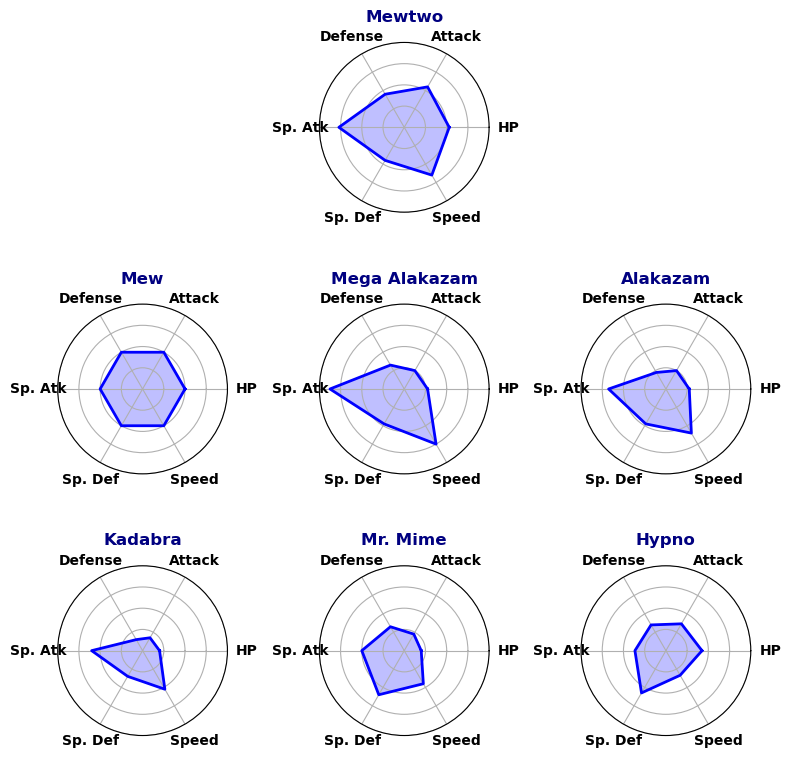

In [30]:
# Configuration des graphiques radar
categories = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
num_vars = len(categories)

# Fonction pour créer un graphique radar pour un Pokémon
def create_radar(ax, stats, name):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    stats += stats[:1]  # Boucler le graphique
    angles += angles[:1]

    ax.fill(angles, stats, color='b', alpha=0.25)
    ax.plot(angles, stats, color='b', linewidth=2)
    ax.set_yticks([50, 100, 150, 200])
    ax.set_ylim(0, 200)
    ax.set_yticklabels([])  # Pas d'affichage des valeurs numériques sur les cercles
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontweight="bold", fontsize=10)  # Texte en gras et agrandi
    ax.set_title(name, size=12, color="navy", pad=15, fontweight="bold")  # Nom en gras et plus grand

# Création de la figure avec disposition personnalisée
fig, axes = plt.subplots(3, 3, subplot_kw={'polar': True}, figsize=(8, 8))

# Disposition personnalisée : 1 graphique au milieu de la première ligne, 6 autour
positions = [
    (0, 1),  # Mewtwo (milieu)
    (1, 0), (1, 1), (1, 2),  # Ligne 2
    (2, 0), (2, 1), (2, 2)   # Ligne 3
]

# Associer les graphiques aux bonnes positions
for i, (index, row) in enumerate(df_mewtwo.iterrows()):
    pos = positions[i]
    create_radar(axes[pos], row[categories].tolist(), row["Name"])

# Masquer les sous-graphiques inutilisés
for i in range(3):
    if i != 1:  # Garder (0,1), cacher (0,0) et (0,2)
        axes[0, i].axis('off')

plt.tight_layout()
plt.show()

#### Fonction pour appliquer à tous les légendaires ciblés.

In [31]:
def knn_radar_plot(légendaire, caractéristiques, categories):
    """
    Applique un modèle KNN sur un Pokémon légendaire pour trouver ses voisins et génère les graphiques radar.

    Args:
        df: DataFrame complet contenant les Pokémon.
        modèle: Modèle KNN déjà entraîné.
        légendaire: Nom du Pokémon légendaire (str).
        caractéristiques: Liste des colonnes caractéristiques utilisées dans KNN.
        categories: Liste des colonnes pour les graphiques radar.

    Returns:
        DataFrame contenant le légendaire et ses voisins réguliers.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # 1. Encodage du légendaire
    caract_légendaire = df[df['Name'] == légendaire]
    caract_légendaire = caract_légendaire[caracteristiques2]
    caract_légendaire_encodé = encodage_predict(caract_légendaire)

    # 2. Application du KNN
    distances, indices = modèle.kneighbors(caract_légendaire_encodé)

    # 3. Création du DataFrame pour le légendaire et ses voisins
    df_voisins = réguliers.iloc[indices[0]]
    df_légendaire = pd.concat([df[df['Name'] == légendaire], df_voisins])
    print(f"DataFrame pour {légendaire} :")
    display(df_légendaire)

    # 4. Création des graphiques radar
    num_vars = len(categories)

    def create_radar(ax, stats, name):
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        stats += stats[:1]  # Boucler le graphique
        angles += angles[:1]

        ax.fill(angles, stats, color='b', alpha=0.25)
        ax.plot(angles, stats, color='b', linewidth=2)
        ax.set_yticks([50, 100, 150, 200])
        ax.set_ylim(0, 200)
        ax.set_yticklabels([])  # Pas d'affichage des valeurs numériques sur les cercles
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontweight="bold", fontsize=10)  # Texte en gras et agrandi
        ax.set_title(name, size=12, color="navy", pad=15, fontweight="bold")  # Nom en gras et plus grand

    fig, axes = plt.subplots(3, 3, subplot_kw={'polar': True}, figsize=(8, 8))

    positions = [
        (0, 1),  # Légendaire au centre
        (1, 0), (1, 1), (1, 2),  # Voisins réguliers autour
        (2, 0), (2, 1), (2, 2)
    ]

    for i, (index, row) in enumerate(df_légendaire.iterrows()):
        pos = positions[i]
        create_radar(axes[pos], row[categories].tolist(), row["Name"])

    # Masquer les sous-graphiques inutilisés
    for i in range(3):
        if i != 1:  # Garder (0,1), cacher (0,0) et (0,2)
            axes[0, i].axis('off')

    plt.tight_layout()
    plt.show()

    return df_légendaire


DataFrame pour Mewtwo :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,None,106,110,90,154,90,130,1,True
295,307,Mega Gardevoir,Psychic,Fairy,68,85,65,165,135,100,3,NaN
205,212,Espeon,Psychic,None,65,65,60,130,95,110,2,NaN
159,166,Mew,Psychic,None,100,100,100,100,100,100,1,NaN
260,272,Celebi,Psychic,Grass,100,100,100,100,100,100,2,NaN
71,72,Mega Alakazam,Psychic,None,55,50,65,175,95,150,1,NaN
70,71,Alakazam,Psychic,None,55,50,45,135,95,120,1,NaN


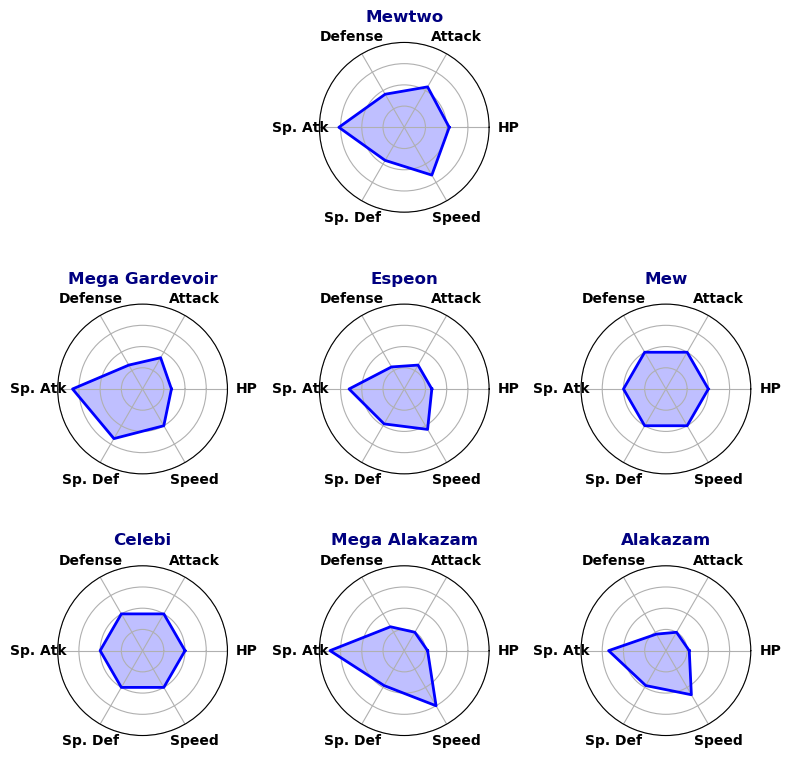

DataFrame pour Lugia :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
269,270,Lugia,Psychic,Flying,106,90,130,90,154,110,2,True
508,547,Cresselia,Psychic,None,120,70,120,75,130,85,4,NaN
159,166,Mew,Psychic,None,100,100,100,100,100,100,1,NaN
260,272,Celebi,Psychic,Grass,100,100,100,100,100,100,2,NaN
105,106,Hypno,Psychic,None,85,73,70,73,115,67,1,NaN
594,638,Gothitelle,Psychic,None,70,55,95,95,110,65,5,NaN
579,623,Sigilyph,Psychic,Flying,72,58,80,103,80,97,5,NaN


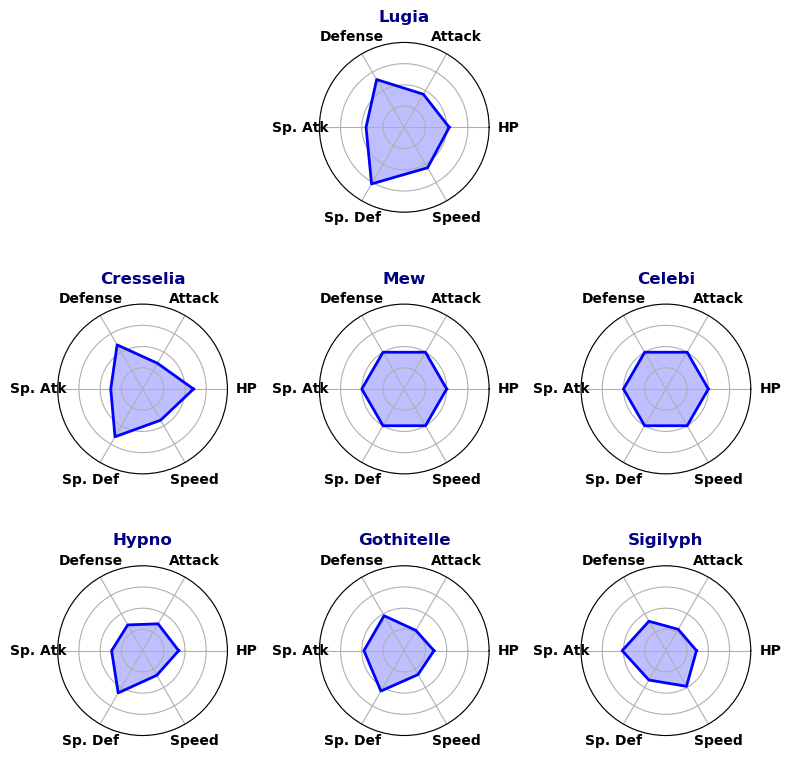

DataFrame pour Rayquaza :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
425,426,Rayquaza,Dragon,Flying,105,150,90,150,90,95,3,True
465,495,Mega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,NaN
397,409,Salamence,Dragon,Flying,95,135,80,110,80,100,3,NaN
398,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,NaN
158,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,NaN
355,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,NaN
464,494,Garchomp,Dragon,Ground,108,130,95,80,85,102,4,NaN


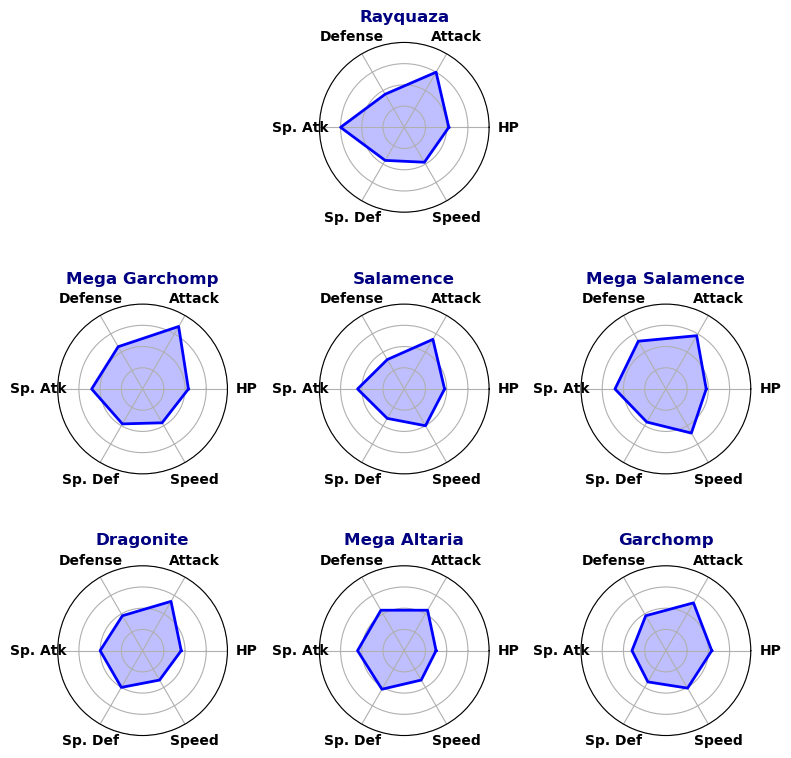

DataFrame pour Giratina Altered Forme :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
544,545,Giratina Altered Forme,Ghost,Dragon,150,100,120,100,120,90,4,True
729,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,6,NaN
727,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,6,NaN
730,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,6,NaN
722,780,Trevenant,Ghost,Grass,85,110,76,65,82,56,6,NaN
444,474,Drifblim,Ghost,Flying,150,80,44,90,54,80,4,NaN
728,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,6,NaN


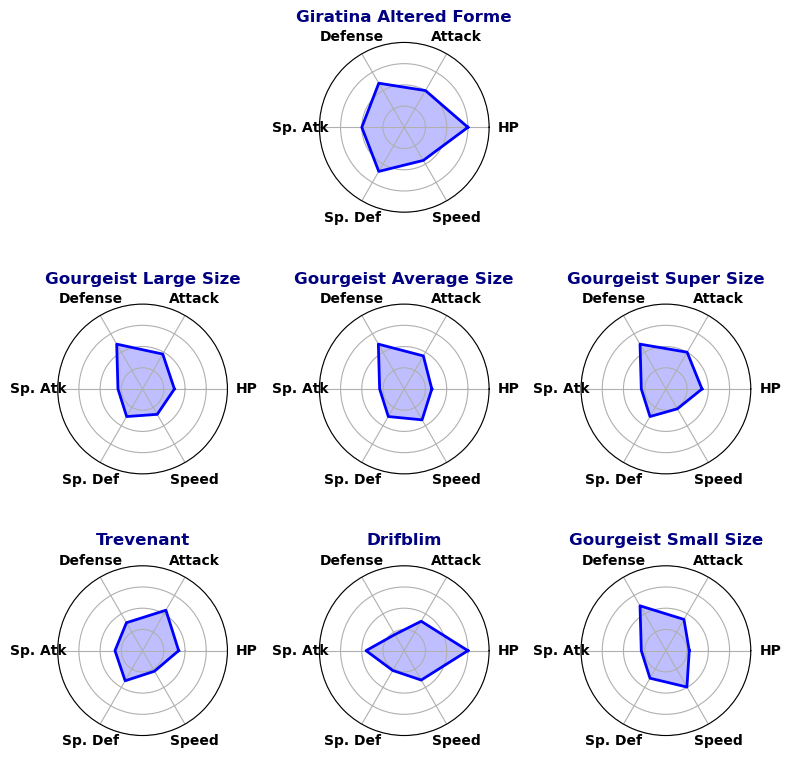

DataFrame pour Giratina Origin Forme :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
545,546,Giratina Origin Forme,Ghost,Dragon,150,120,100,120,100,90,4,True
444,474,Drifblim,Ghost,Flying,150,80,44,90,54,80,4,NaN
376,388,Mega Banette,Ghost,None,64,165,75,93,83,75,3,NaN
722,780,Trevenant,Ghost,Grass,85,110,76,65,82,56,6,NaN
375,387,Banette,Ghost,None,64,115,65,83,63,65,3,NaN
101,102,Gengar,Ghost,Poison,60,65,60,130,75,110,1,NaN
448,478,Mismagius,Ghost,None,60,60,60,105,105,105,4,NaN


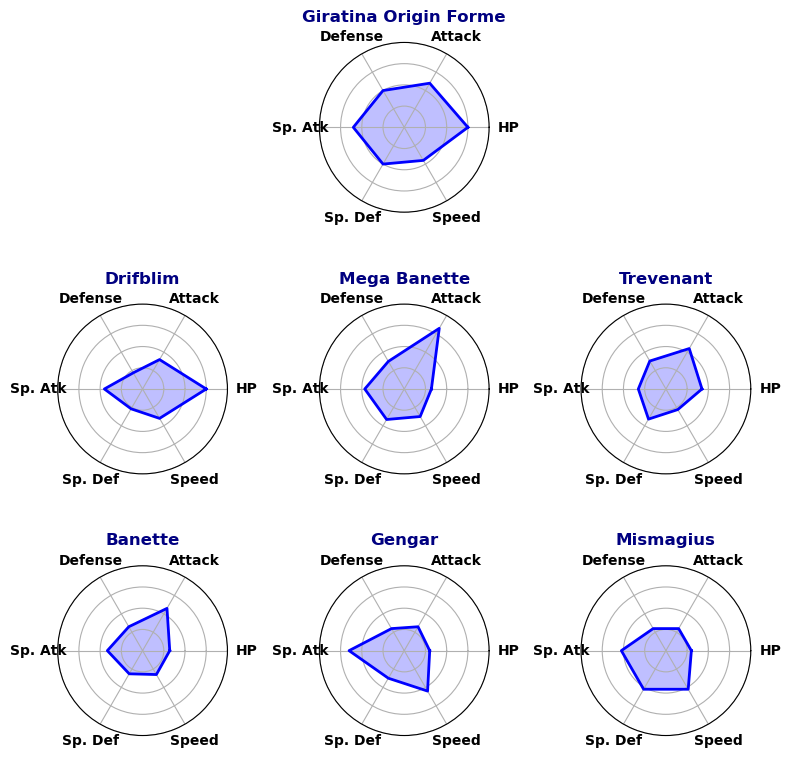

DataFrame pour Dialga :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
540,541,Dialga,Steel,Dragon,100,120,120,150,100,90,4,True
402,414,Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,NaN
401,413,Metagross,Steel,Psychic,80,135,130,95,90,70,3,NaN
693,751,Aegislash Blade Forme,Steel,Ghost,60,150,50,150,50,60,6,NaN
619,663,Klinklang,Steel,None,60,100,115,70,85,90,5,NaN
720,778,Klefki,Steel,Fairy,57,80,91,80,87,75,6,NaN
456,486,Bronzong,Steel,Psychic,67,89,116,79,116,33,4,NaN


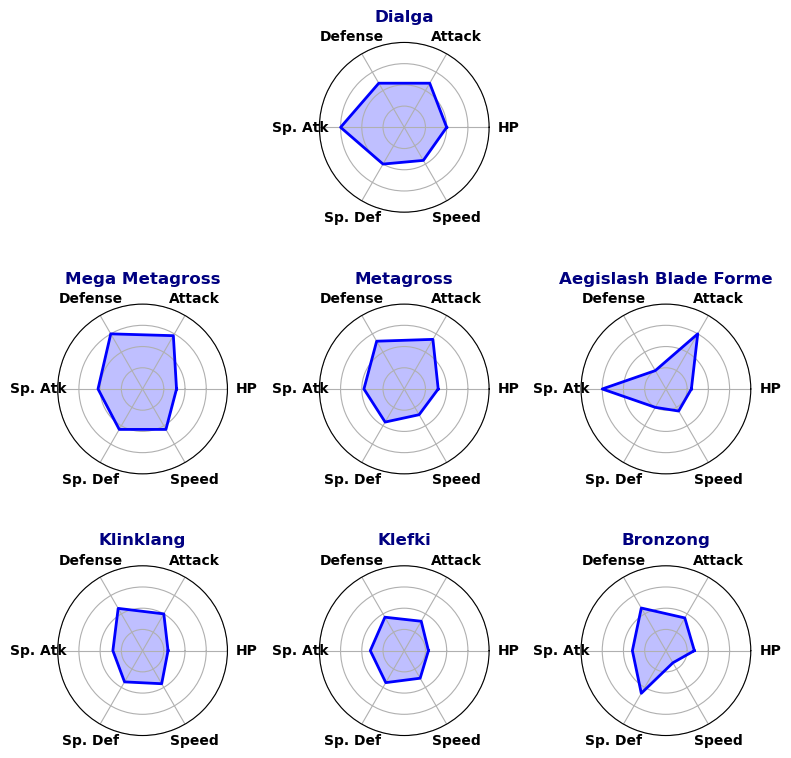

DataFrame pour Palkia :


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
541,542,Palkia,Water,Dragon,90,120,100,150,120,100,4,True
12,13,Mega Blastoise,Water,None,79,103,120,135,115,78,1,NaN
657,715,Keldeo Resolute Forme,Water,Fighting,91,72,90,129,90,108,5,NaN
656,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,NaN
510,549,Manaphy,Water,None,100,100,100,100,100,100,4,NaN
243,250,Kingdra,Water,Dragon,75,95,95,95,95,85,2,NaN
338,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,NaN


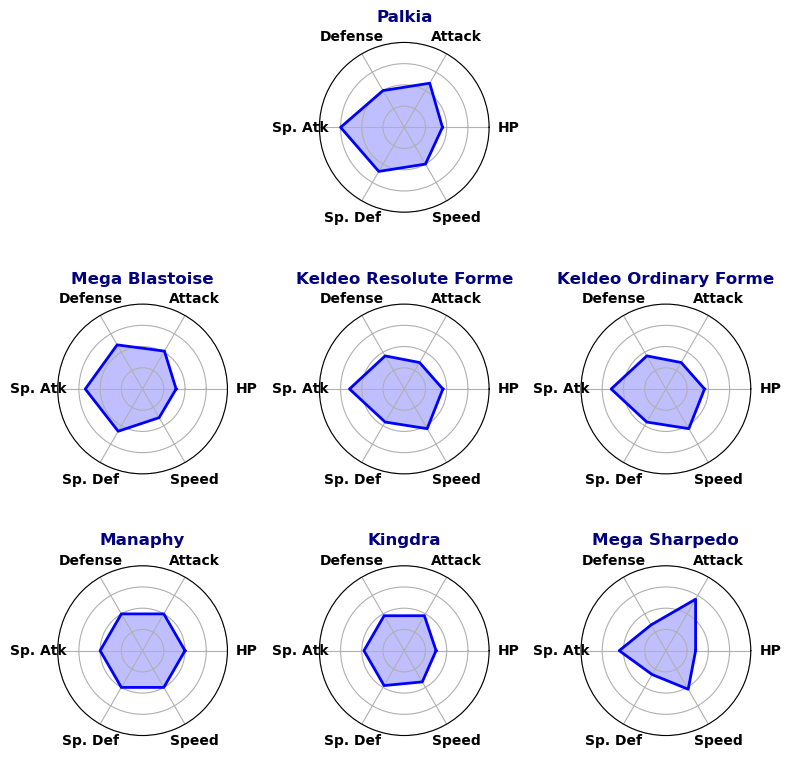

In [32]:
legendaires_cibles = ['Mewtwo', 'Lugia', 'Rayquaza',
                      'Giratina Altered Forme', 'Giratina Origin Forme',
                      'Dialga', 'Palkia']

caracteristiques2 = ["Type 1", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
categories_radar = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# Appliquer la fonction pour chaque légendaire
dfs_legendaires = {}

for légendaire in legendaires_cibles:
    df_leg = knn_radar_plot(légendaire, caracteristiques2, categories_radar)
    dfs_legendaires[légendaire] = df_leg


#### Visualisation des proches voisins pour chaque légendaire

Un graphique interactif montrant :
   - La répartition des Pokémon non légendaires dans l'espace PCA.
   - Les Pokémon légendaires en couleurs vives et leurs relations avec des Pokémon similaires.


In [34]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

def pokemons_similaires(nom_pokemon):

  # Vérifier si le Pokémon existe dans le dataset
  if nom_pokemon not in df['Name'].values:
      return f"Le Pokémon {nom_pokemon} n'est pas dans le dataset."

  # Récupérer les caractéristiques du Pokémon
  pokemon = df[df['Name'] == nom_pokemon]

  # Vérifier si le Pokémon est légendaire
  if not pokemon['Legendary'].iloc[0]:
      return f"{nom_pokemon} n'est pas un Pokémon légendaire."

  # Je recopie ce qu'on a fait avant:
  caract_pokemon = df[df['Name'] == nom_pokemon][caracteristiques2]

  caract_pokemon_encoded = encodage_predict(caract_pokemon)

  distances, indices = modèle.kneighbors(caract_pokemon_encoded)

  return réguliers.iloc[indices[0]].reset_index(drop=True)

def visualize_all_pokemon_distances(champion_pokemon):
    # Préparation des données pour la PCA
    pca = PCA(n_components=2)
    X_pca_non_legendary = pca.fit_transform(X_réguliers2)

    # DataFrame de base pour les non-légendaires
    pca_df_non_legendary = pd.DataFrame(data=X_pca_non_legendary,
                                      columns=['PC1', 'PC2'])
    pca_df_non_legendary['Name'] = réguliers['Name'].values
    pca_df_non_legendary['Type'] = 'Non Legendary'

    # Création du graphique
    fig = go.Figure()

    # Ajout des points non légendaires
    fig.add_trace(go.Scatter(
        x=pca_df_non_legendary['PC1'],
        y=pca_df_non_legendary['PC2'],
        mode='markers',
        marker=dict(color='lightgray', size=8, opacity=0.5),
        name='Non Legendary',
        hovertext=pca_df_non_legendary['Name'],
        hoverinfo='text'
    ))

    # Couleurs pour les différents Pokémon légendaires
    colors = px.colors.qualitative.Set1

    # Pour chaque Pokémon légendaire
    for i, pokemon_name in enumerate(champion_pokemon):
        # Encodage du Pokémon légendaire
        caract_pokemon = df[df['Name'] == pokemon_name][caracteristiques2]
        caract_pokemon_encoded = encodage_predict(caract_pokemon)

        # Transformation PCA
        pokemon_pca = pca.transform(caract_pokemon_encoded)

        # Ajout du Pokémon légendaire
        fig.add_trace(go.Scatter(
            x=[pokemon_pca[0, 0]],
            y=[pokemon_pca[0, 1]],
            mode='markers+text',
            marker=dict(color=colors[i % len(colors)], size=15, symbol='star'),
            name=pokemon_name,
            text=[pokemon_name],
            textposition="top center",
            hoverinfo='text'
        ))

        # Récupération des plus proches voisins
        # similar_pokemon = pokemons_similaires(pokemon_name)
        similar_pokemon = dfs_legendaires[pokemon_name]
        top_3_similar = similar_pokemon.iloc[1:4]

        # Trouver les coordonnées PCA des Pokémon similaires
        similar_indices = pca_df_non_legendary[pca_df_non_legendary['Name'].isin(top_3_similar['Name'])].index
        similar_pca = X_pca_non_legendary[similar_indices]

        # Ajout des Pokémon similaires avec des lignes les reliant au légendaire
        for j in range(len(similar_pca)):
            # Ligne reliant le Pokémon légendaire à son similaire
            fig.add_trace(go.Scatter(
                x=[pokemon_pca[0, 0], similar_pca[j, 0]],
                y=[pokemon_pca[0, 1], similar_pca[j, 1]],
                mode='lines',
                line=dict(color=colors[i % len(colors)], width=1, dash='dot'),
                showlegend=False,
                hoverinfo='none'
            ))

            # Point du Pokémon similaire
            fig.add_trace(go.Scatter(
                x=[similar_pca[j, 0]],
                y=[similar_pca[j, 1]],
                mode='markers+text',
                marker=dict(color=colors[i % len(colors)], size=10),
                name=f'Similar to {pokemon_name}',
                text=[top_3_similar['Name'].iloc[j]],
                textposition="top center",
                showlegend=False,
                hovertext=[f"Similar to {pokemon_name}: {top_3_similar['Name'].iloc[j]}"],
                hoverinfo='text'
            ))

    # Mise à jour du layout
    fig.update_layout(
        title='PCA: Pokémons légendaires et leurs voisins similaires',
        xaxis_title=f'PC1 (Variance: {pca.explained_variance_ratio_[0]:.2%})',
        yaxis_title=f'PC2 (Variance: {pca.explained_variance_ratio_[1]:.2%})',
        hovermode='closest',
        width=1200,
        height=800
    )

    # Afficher le graphique
    fig.show()

    # Afficher l'information sur la variance expliquée totale
    total_var = pca.explained_variance_ratio_.sum()
    print(f"\nTotal variance explained by these 2 components: {total_var:.2%}")

# Utilisation de la fonction
visualize_all_pokemon_distances(legendaires_cibles)


Total variance explained by these 2 components: 22.18%
